In [1]:
from bikescience import grid

import matplotlib.pyplot as plt
import json

In [2]:
geo_df = grid.Grid().geodataframe() 
geo_df.head()

i  j                                           geometry
0  0  0  POLYGON ((-71.15980135 42.29519999999999, -71....
1  0  1  POLYGON ((-71.15171169999999 42.29519999999999...
2  0  2  POLYGON ((-71.14362204999999 42.29519999999999...
3  0  3  POLYGON ((-71.1355324 42.29519999999999, -71.1...
4  0  4  POLYGON ((-71.12744275 42.29519999999999, -71....

In [3]:
points = geo_df['geometry'][0]
type(points)

shapely.geometry.polygon.Polygon

In [4]:
xy = points.exterior.coords.xy
xy

(array('d', [-71.15980135, -71.15980135, -71.167891, -71.167891, -71.15980135]),
 array('d', [42.295199999999994, 42.3012051, 42.3012051, 42.295199999999994, 42.295199999999994]))

In [5]:
x = xy[1]
y = xy[0]
x, y

# [42.295199999999994, -71.15980135], [42.3012051, -71.15980135], [42.3012051, -71.167891], [42.295199999999994, -71.167891]

(array('d', [42.295199999999994, 42.3012051, 42.3012051, 42.295199999999994, 42.295199999999994]),
 array('d', [-71.15980135, -71.15980135, -71.167891, -71.167891, -71.15980135]))

In [6]:
x[0:-1]

array('d', [42.295199999999994, 42.3012051, 42.3012051, 42.295199999999994])

In [7]:
for i in range(len(xy[0])-1):
    print(xy[0][i])

-71.15980135
-71.15980135
-71.167891
-71.167891


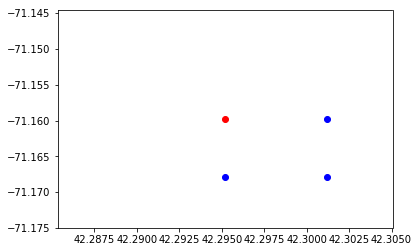

In [8]:
plt.figure()

plt.scatter(x[0], y[0], color='red')
plt.scatter(x[1:-1], y[1:-1], color='blue')

plt.show()

In [13]:
rects = []
for rect in geo_df.geometry:
    xy = rect.exterior.coords.xy
    points = []
    for r in range(4):
        points.append([xy[1][r], xy[0][r]])
    rects.append(points)
rects_json = json.dumps(rects)
print(rects_json)

[[[42.295199999999994, -71.15980135], [42.3012051, -71.15980135], [42.3012051, -71.167891], [42.295199999999994, -71.167891]], [[42.295199999999994, -71.15171169999999], [42.3012051, -71.15171169999999], [42.3012051, -71.15980135], [42.295199999999994, -71.15980135]], [[42.295199999999994, -71.14362204999999], [42.3012051, -71.14362204999999], [42.3012051, -71.15171169999999], [42.295199999999994, -71.15171169999999]], [[42.295199999999994, -71.1355324], [42.3012051, -71.1355324], [42.3012051, -71.14362204999999], [42.295199999999994, -71.14362204999999]], [[42.295199999999994, -71.12744275], [42.3012051, -71.12744275], [42.3012051, -71.1355324], [42.295199999999994, -71.1355324]], [[42.295199999999994, -71.1193531], [42.3012051, -71.1193531], [42.3012051, -71.12744275], [42.295199999999994, -71.12744275]], [[42.295199999999994, -71.11126345], [42.3012051, -71.11126345], [42.3012051, -71.1193531], [42.295199999999994, -71.1193531]], [[42.295199999999994, -71.1031738], [42.3012051, -71.

In [14]:
len(geo_df), len(rects)

(400, 400)

In [27]:
with open('../data/boston/poi/places.json') as f:
    places_json = json.loads(f.read())

In [35]:
places_json[0]  # each element is a grid cell

[{'geometry': {'location': {'lat': 42.3004491, 'lng': -71.16193299999998},
   'viewport': {'east': -71.15927905000001,
    'north': 42.3018390302915,
    'south': 42.2991410697085,
    'west': -71.16281765000002}},
  'html_attributions': [],
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/generic_recreational-71.png',
  'id': '3b26ddfdbf6357aa1c1138cda8fd63041f8f612a',
  'name': 'D. Blakely Hoar Sanctuary',
  'photos': [{'height': 3024,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/116058170693245712502/photos">Victor Brunko</a>'],
    'width': 4032}],
  'place_id': 'ChIJwwRJS8l444kRkHXOmwVYJ_Q',
  'plus_code': {'compound_code': '8R2Q+56 Boston, Massachusetts, United States',
   'global_code': '87JC8R2Q+56'},
  'rating': 4.7,
  'reference': 'ChIJwwRJS8l444kRkHXOmwVYJ_Q',
  'scope': 'GOOGLE',
  'types': ['park', 'point_of_interest', 'establishment'],
  'user_ratings_total': 13,
  'vicinity': 'Chestnut Hill'},
 {'geometry': {'location': {'lat': 42.

In [36]:
places_json[0][0]  # each element is a place

{'geometry': {'location': {'lat': 42.3004491, 'lng': -71.16193299999998},
  'viewport': {'east': -71.15927905000001,
   'north': 42.3018390302915,
   'south': 42.2991410697085,
   'west': -71.16281765000002}},
 'html_attributions': [],
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/generic_recreational-71.png',
 'id': '3b26ddfdbf6357aa1c1138cda8fd63041f8f612a',
 'name': 'D. Blakely Hoar Sanctuary',
 'photos': [{'height': 3024,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/116058170693245712502/photos">Victor Brunko</a>'],
   'width': 4032}],
 'place_id': 'ChIJwwRJS8l444kRkHXOmwVYJ_Q',
 'plus_code': {'compound_code': '8R2Q+56 Boston, Massachusetts, United States',
  'global_code': '87JC8R2Q+56'},
 'rating': 4.7,
 'reference': 'ChIJwwRJS8l444kRkHXOmwVYJ_Q',
 'scope': 'GOOGLE',
 'types': ['park', 'point_of_interest', 'establishment'],
 'user_ratings_total': 13,
 'vicinity': 'Chestnut Hill'}

In [37]:
qty = 0
for p in places_json:
    qty += len(p)
qty

282